## Домашнее задание 3.

**Выполнила Шарыпина Даша, гр. 6382**

### Задание 1

In [111]:
import numpy as np
from cvxopt import matrix, solvers

In [126]:
G = matrix([[2., 1, -2, -1, -1, 0], [-2, -1, 2, 1, 0, -1]])

h = matrix([2., 2] + [0]*4)

c = matrix([1.]*2)

In [37]:
slv = solvers.lp(c, G, h)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.7756e-16 -4.0000e+00  1e+01  1e+00  1e+00  1e+00
 1:  9.2852e-02 -1.4614e-01  7e-01  2e-01  1e-01  4e-01
 2: -5.3842e-03 -2.2695e-02  3e-02  6e-03  6e-03  1e-02
 3: -5.2097e-05 -2.2635e-04  3e-04  6e-05  6e-05  1e-04
 4: -5.2095e-07 -2.2634e-06  3e-06  6e-07  6e-07  1e-06
 5: -5.2095e-09 -2.2634e-08  3e-08  6e-09  6e-09  1e-08
Optimal solution found.


In [38]:
print('Optimal solution \n', np.round(slv['x']))

Optimal solution 
 [[-0.]
 [-0.]]


Т.к. $x = x_+ - x_-$, то в результате $x = 0$

**Визуализация:**

Красная точка - точка $y$

Зеленая точка - точка $x^*$

Прямая - $\Phi x$

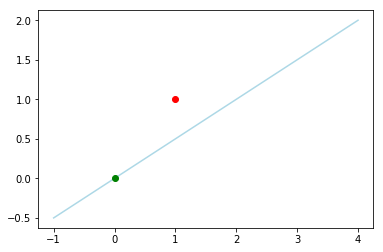

In [24]:
import matplotlib.pyplot as plt
ax = plt.subplot(1, 1, 1)
plt.plot([-1, 4], [-0.5, 2], color = "lightblue")
ax.plot(1, 1, "or")
ax.plot(0, 0, "or", color = "green")

------------------

### Задание 2

$$\underset{t, u}{\min}t$$
$$\mathrm{s.t.}\quad 1^Tu = t, \quad u \geq 0$$
$$t \geq 0$$
$$\Phi P u = y$$

\begin{equation*}
x = 
    \begin{pmatrix}
        t\\
        u_1\\
        \vdots\\
        u_n
    \end{pmatrix}
\end{equation*}

In [112]:
P = np.array([[0., 0], [1, 0], [0, 1], [-1, 1], [-1, 0], [0, -1], [1, -1]]).T
F = np.array([[1., 2]])
y = 10


A = np.dot(F, P)
A_ = -A

C = np.array([[1.] + [-1]*6])
C_ = -C

E = -np.eye(7)

G = matrix(np.concatenate((A, A_, C, C_, E)))

h = matrix([y, -y] + [0.]*9)

c = matrix([1.] + [0]*6)

In [102]:
slv = solvers.lp(c, G, h)

     pcost       dcost       gap    pres   dres   k/t
 0: -1.9230e-16 -0.0000e+00  3e+01  6e-01  3e+00  1e+00
 1:  4.1884e+00  4.6652e+00  2e+01  2e-01  9e-01  8e-01
 2:  5.2529e+00  5.3158e+00  2e+00  2e-02  1e-01  1e-01
 3:  5.0015e+00  5.0026e+00  2e-02  3e-04  1e-03  2e-03
 4:  5.0000e+00  5.0000e+00  2e-04  3e-06  1e-05  2e-05
 5:  5.0000e+00  5.0000e+00  2e-06  3e-08  1e-07  2e-07
 6:  5.0000e+00  5.0000e+00  2e-08  3e-10  1e-09  2e-09
Optimal solution found.


Решение:

In [103]:
print(np.round(slv['x']))

[[ 5.]
 [ 0.]
 [ 5.]
 [ 0.]
 [-0.]
 [-0.]
 [-0.]]


Тогда получаем $t = 5$, $x = (0, 5)$

Визуализация:

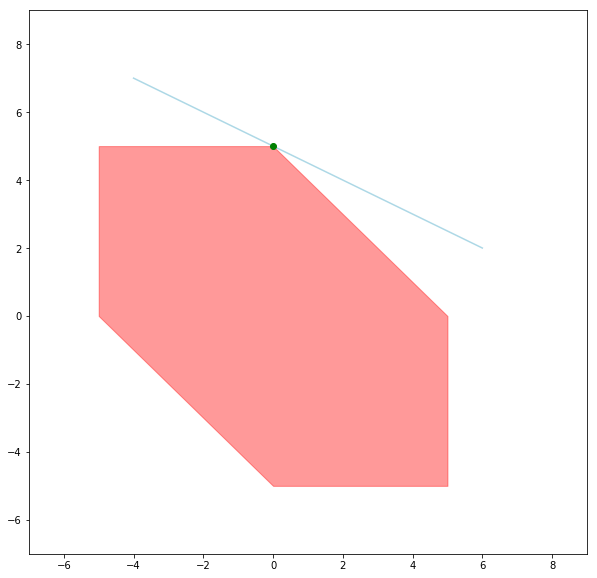

In [129]:
from IPython.core.pylabtools import figsize
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

figsize(10,10)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([-7, 9])
ax.set_ylim([-7, 9])

p = 5*np.array([(1, 0), (0, 1), (-1, 1), (-1, 0), (0, -1), (1, -1)])

patches.append(Polygon(np.array(p), True))

pt = PatchCollection(patches, color=['red'], alpha=0.4)

plt.plot([-4, 6], [7, 2], color = "lightblue")
plt.plot(0, 5, 'or', color = "green")
ax.add_collection(pt)
plt.show()

------------

### Задание 3

Переписать задачу в виде:
$$\underset{x, z}{\min} f_1(x) + f_2(z)$$
$$\mathrm{s.t.} \quad Ax + Bz = c$$
$$x \in C_1, z \in C_2$$

Описать и реализовать alternating deriction method of multipliers (ADMM) для решения этой задачи.

Параметр $\rho$ алгоритма ADMM должен быть больше единицы

In [99]:
def ADMM(A, B, c, rho = 1, iter_num = 10^3):
    x = np.random.randn(1,)
    z = np.random.randn(6,)
    y = np.zeros(len(c))

    for k in range(iter_num):
        x = calc_x(z, y, rho)
        z = calc_z(A, B, x, y, c, rho)
        y = calc_y(A, B, x, z, y, c, rho)
        
        if norm(np.dot(A, x) + np.dot(B, z) - c) / max(norm(x), norm(z)) < 1e-10:
            break
       
    return np.array([x[0], z[0], z[1], z[2], z[3], z[4], z[5]])

In [102]:
def calc_x(z, y, rho):
    return np.array([sum(z) - (y[0] + 1.) / rho])

In [101]:
def calc_y(A, B, x, z, y, c, rho):
    return y + rho*(np.dot(A, x) + np.dot(B, z) - c)

In [104]:
def calc_z(A, B, x, y, c, rho):
    P = rho * np.dot(np.transpose(B), B)
    q = (y.T.dot(B) + rho*x[0]*A.T.dot(B)-rho*c.T.dot(B)).T
    G = -np.eye(6)
    h = np.zeros(6)

    G = matrix(G)
    h = matrix(h)
    P = matrix(P)
    q = matrix(q)

    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h)

    return np.array([sol['x'][0], sol['x'][1], sol['x'][2], sol['x'][3], sol['x'][4], sol['x'][5]])

In [125]:
A = np.array([[1.], [0.]])
B = np.array([[-1.]*6, [FP[0], FP[1], FP[2], FP[3], FP[4], FP[5]]])
c = np.array([0., y])

sol = ADMM(A, B, c)

print("Solution:")
print("Optimal u:")
t = sol[0]
x = np.array([0., 0.])
for i in range(6):
    print(addm_sol[i + 1])
    x += addm_sol[i + 1]*feasible_reg[i]
print("Optimal x: (", x[0], ", ", x[1], ")")
print("Optimal t: ", t)

Solution:
Optimal u:
1.3622595449671785e-06
5.0052515753494635
1.3622595449671626e-06
3.4400445706269815e-07
1.8618871996192753e-07
3.4400445706269254e-07
Optimal x: ( 1.0270274485458392e-20 ,  5.005252407415832 )
Optimal t:  5.013972809122369


Полученный результат сопадает с результатом, полученным в задании 2.

------------

### Задание 4: Topic modeling, NMF

Неотрицательное матричное разложение (non-negative matrix factorization, NMF)

Идея NMF заключается в представлении матрицы наблюдений $X$ как произведение двух матриц с неотрицательными элементами: 
$$X \approx WH$$

где $W \in \mathbb{R}_+^{M \times K}$, $H \in \mathbb{R}_+^{K \times N}$, причем $K << \min(M,N)$.

$W$ и $H$ находятся как решение следующей задачи оптимизации:

$$\underset{W,H}{\min} \|X - WH\|^2_F$$
$$\mathrm{s.t.} \quad W_{ik} \geq 0, H_{kj} \geq 0$$

Перепишем целевую функцию в следующем виде:

$$\|X - WH\|_F^2 = \|X - \sum_k w_k h_k^T\|_F^2 = \|(X - \sum_{k \neq l} w_k h_k^T) - w_l h_l^T$$
Здесь $w_k$ - $k$-ый столбец матрицы $W$, а $h_k^T$ - $k$-ая строка матрицы $H$.

Алгоритм RRI заключается в попеременном обновлении столбцов матрицы $W$ и строк матрицы $H$, на каждом шаге которого решается задача вида:

$$\underset{u}{\min} \|G - uv^T\|_F^2$$
$$\mathrm{s.t.} \quad u \geq 0$$

Аналитическое решение получим с использованием ККТ-условий.

Условие $u \geq 0$ в стандартной форме запишется как $-u \leq 0$

Тогда запишем Лагранжиан для данной задачи:

$$L(u, \lambda) = \|G - uv^T\|_F^2 - \lambda u$$

Условия ККТ:

$$\nabla_u L = 0$$
$$-u \leq 0$$
$$-\lambda u = 0$$
$$\lambda \geq 0$$

Найдем $\nabla_u L$

В силу линейности градиента:
$$\nabla_uL = \nabla_u(\|G - uv^T\|_F^2) - \nabla_u(\lambda u)$$

Рассмотрим первое слагаемое:

\begin{equation*}
    \begin{split}
        d(\|G - uv^T\|_F^2) &= d(\mathrm{tr}((G - uv^T)^T(G - uv^T)))\\
        &= d(\mathrm{tr}(G^TG - G^Tuv^T - vu^TG + vu^Tuv^T))\\
        &= d(\mathrm{tr}(\|G\|_2^2 -2v^TG^Tu + \|v\|^2_2u^Tu))\\
        &= \mathrm{tr}(-d(2v^TG^Tu) + d(\|v\|^2_2u^Tu))\\
        &= \mathrm{tr}(-2v^TG^Tdu + 2\|v\|^2_2u^Tdu)
    \end{split}
\end{equation*}

В итоге получаем, что:
$$\nabla_u(\|G - uv^T\|_F^2) = -2Gv +2\|v\|^2_2u$$

Отсюда получаем:
$$\nabla_u L = -2Gu +2\|v\|^2_2u - \lambda$$

$$\nabla_u L = 0$$
$$-2Gu +2\|v\|^2_2u - \lambda = 0$$

Из третьего условия получаем 2 случая: либо $\lambda = 0$, либо $u = 0$

Если решение не тривиально и $u \neq 0$, то получаем $\lambda = 0$ и 
$$u = \frac{Gv}{\|v\|^2_2}$$

Аналогично для задачи 
$$\underset{v}{\min}\|G - uv^T\|_F^2$$
$$\mathrm{s.t.} \quad u \geq 0$$

Нетривиальным решением является: $$v = \frac{G^T u}{\|u\|^2_2}$$

В случае решения задачи NMF:
$$G = X - \sum_{k \neq l}w_k h_k^T$$

In [14]:
from numpy.linalg import norm

In [16]:
def obj(X, W, H):
    return norm(X - np.dot(W, H), 'fro')

In [15]:
def residual_matrix(X, W, H, l):
    return X - (np.dot(W,H) - np.outer(W[:, l], H[l, :]))

In [17]:
def proj_vec(x):
    return np.maximum(0, x)

In [55]:
def NMF(X, k):
    m, n = X.shape
    W = np.random.rand(m, k)
    H = np.random.rand(k, n)
    f_prev = float('inf')
    j = 0
    while f_prev - obj(X, W, H) > 1e-20:
        f_prev = obj(X, W, H)
        for i in range(k):
            ui = W[:, i] 
            vi = H[i, :] 
            
            G = residual_matrix(X, W, H, i)
            
            if np.all(ui == 0):
                H[i, :] = 0
            else:
                H[i, :] = proj_vec(np.dot(G.T, ui)/(norm(ui)**2))
                
            if np.all(vi == 0):
                W[:, i] = 0
            else:
                W[:, i] = proj_vec(np.dot(G, vi.T)/(norm(vi)**2))
                
        objective = norm(X - np.dot(W,H), 'fro')**2
        print("Iter: %5d, Objective: %F" % (j, objective))
        j = j + 1

    return W, H

In [27]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [28]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [29]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [30]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [84]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(newsgroups_train.data).todense().T # (vocab, documents)

print(X.shape)

(26576, 2034)


In [33]:
vocab = np.array(vectorizer.get_feature_names())

In [34]:
print(vocab.shape)

(26576,)


In [35]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

In [36]:
num_top_words=8

def show_topics(topics):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in topics])
    return [' '.join(t) for t in topic_words]

$K = 3$

In [38]:
W, H = NMF(X, 3)

Iter:     0, Objective: 693177.957919
Iter:     1, Objective: 638083.477060
Iter:     2, Objective: 623770.496904
Iter:     3, Objective: 617239.625284
Iter:     4, Objective: 610562.910135
Iter:     5, Objective: 601969.647716
Iter:     6, Objective: 594363.809645
Iter:     7, Objective: 588603.854127
Iter:     8, Objective: 584381.291490
Iter:     9, Objective: 581837.973779
Iter:    10, Objective: 580509.241341
Iter:    11, Objective: 579651.120614
Iter:    12, Objective: 578822.941284
Iter:    13, Objective: 577891.418178
Iter:    14, Objective: 576610.391769
Iter:    15, Objective: 574619.147565
Iter:    16, Objective: 571480.198993
Iter:    17, Objective: 566969.860882
Iter:    18, Objective: 561774.219085
Iter:    19, Objective: 557376.325997
Iter:    20, Objective: 554698.825685
Iter:    21, Objective: 553332.732033
Iter:    22, Objective: 552660.563718
Iter:    23, Objective: 552300.333078
Iter:    24, Objective: 552035.944835
Iter:    25, Objective: 551813.153611
Iter:    26,

In [39]:
residual = X - np.dot(W, H)

print("Norm of the residual: %f" % (norm(residual, 'fro')))

Norm of the residual: 741.270259


In [40]:
show_topics(W.T)

['space launch jesus god satellite people nasa matthew',
 'edu graphics pub image data ftp mail available',
 'jpeg image gif file color images format quality']

$K = 5$

In [45]:
W, H = NMF(X, 5)

Iter:     0, Objective: 605997.981653
Iter:     1, Objective: 573182.436924
Iter:     2, Objective: 562051.131599
Iter:     3, Objective: 556697.774658
Iter:     4, Objective: 554542.310236
Iter:     5, Objective: 553557.150947
Iter:     6, Objective: 552763.533123
Iter:     7, Objective: 552031.343489
Iter:     8, Objective: 551338.855783
Iter:     9, Objective: 550756.130112
Iter:    10, Objective: 550340.707527
Iter:    11, Objective: 550072.060346
Iter:    12, Objective: 549892.101709
Iter:    13, Objective: 549768.181087
Iter:    14, Objective: 549682.071345
Iter:    15, Objective: 549621.976131
Iter:    16, Objective: 549580.046628
Iter:    17, Objective: 549550.787125
Iter:    18, Objective: 549530.348719
Iter:    19, Objective: 549516.037833
Iter:    20, Objective: 549505.980684
Iter:    21, Objective: 549498.889138
Iter:    22, Objective: 549493.877364
Iter:    23, Objective: 549490.328904
Iter:    24, Objective: 549487.812690
Iter:    25, Objective: 549486.026015
Iter:    26,

In [46]:
residual = X - np.dot(W, H)

print("Norm of the residual: %f" % (norm(residual, 'fro')))

Norm of the residual: 741.270259


In [47]:
show_topics(W.T)

['zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'space launch jesus god satellite people nasa matthew',
 'jpeg image gif file color images format quality',
 'edu graphics pub image data ftp mail available']

$K = 8$

In [60]:
W, H = NMF(X, 8)

Iter:     0, Objective: 670314.073678
Iter:     1, Objective: 612495.841733
Iter:     2, Objective: 569346.602925
Iter:     3, Objective: 557360.659862
Iter:     4, Objective: 554044.988899
Iter:     5, Objective: 552618.268993
Iter:     6, Objective: 551761.321467
Iter:     7, Objective: 551138.042470
Iter:     8, Objective: 550674.754513
Iter:     9, Objective: 550334.115418
Iter:    10, Objective: 550086.997173
Iter:    11, Objective: 549909.736787
Iter:    12, Objective: 549783.547878
Iter:    13, Objective: 549694.362560
Iter:    14, Objective: 549631.526824
Iter:    15, Objective: 549587.296377
Iter:    16, Objective: 549556.192167
Iter:    17, Objective: 549534.331990
Iter:    18, Objective: 549518.946418
Iter:    19, Objective: 549508.091265
Iter:    20, Objective: 549500.411711
Iter:    21, Objective: 549494.968514
Iter:    22, Objective: 549491.106459
Iter:    23, Objective: 549488.366815
Iter:    24, Objective: 549486.421176
Iter:    25, Objective: 549485.037299
Iter:    26,

In [61]:
residual = X - np.dot(W, H)

print("Norm of the residual: %f" % (norm(residual, 'fro')))

Norm of the residual: 741.270259


In [62]:
show_topics(W.T)

['zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'space launch jesus god satellite people nasa matthew',
 'edu graphics pub image data ftp mail available',
 'jpeg image gif file color images format quality']

$K = 10$

In [65]:
W, H = NMF(X, 10)

Iter:     0, Objective: 651508.142968
Iter:     1, Objective: 584959.704815
Iter:     2, Objective: 576780.334172
Iter:     3, Objective: 574545.683369
Iter:     4, Objective: 573664.442679
Iter:     5, Objective: 573274.823230
Iter:     6, Objective: 573099.868301
Iter:     7, Objective: 573003.311772
Iter:     8, Objective: 572947.681033
Iter:     9, Objective: 572914.167163
Iter:    10, Objective: 572893.033425
Iter:    11, Objective: 572878.759005
Iter:    12, Objective: 572868.334569
Iter:    13, Objective: 572860.198335
Iter:    14, Objective: 572853.534137
Iter:    15, Objective: 572847.946472
Iter:    16, Objective: 572842.982266
Iter:    17, Objective: 572838.415788
Iter:    18, Objective: 572834.136794
Iter:    19, Objective: 572830.029016
Iter:    20, Objective: 572825.976528
Iter:    21, Objective: 572821.812149
Iter:    22, Objective: 572816.953064
Iter:    23, Objective: 572811.164564
Iter:    24, Objective: 572804.129909
Iter:    25, Objective: 572795.444665
Iter:    26,

In [63]:
residual = X - np.dot(W, H)

print("Norm of the residual: %f" % (norm(residual, 'fro')))

Norm of the residual: 741.270259


In [66]:
show_topics(W.T)

['zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'zyxel earthly earned earnest earnestly earnings earnshaw ears',
 'jpeg image gif file color images format quality',
 'space launch jesus god satellite people nasa matthew',
 'edu graphics pub image data ftp mail available']

In [69]:
def NMF_obj(X, k):
    m, n = X.shape
    W = np.random.rand(m, k)
    H = np.random.rand(k, n)
    f_prev = float('inf')
    obj_vals = []
    #for j in range(iter_num):  
    j = 0
    while f_prev - obj(X, W, H) > 1e-20:
        f_prev = obj(X, W, H)
        for i in range(k):
            ui = W[:, i] 
            vi = H[i, :] 
            
            G = residual_matrix(X, W, H, i)
            
            if np.all(ui == 0):
                H[i, :] = 0
            else:
                H[i, :] = proj_vec(np.dot(G.T, ui)/(norm(ui)**2))
                
            if np.all(vi == 0):
                W[:, i] = 0
            else:
                W[:, i] = proj_vec(np.dot(G, vi.T)/(norm(vi)**2))
                
        objective = norm(X - np.dot(W,H), 'fro')**2
        obj_vals.append(objective)
        print("Iter: %5d, Objective: %F" % (j, objective))
        j = j + 1
            
    return obj_vals, j

In [85]:
obj_val, iter_num = NMF_obj(X, 3)

Iter:     0, Objective: 669385.431794
Iter:     1, Objective: 590313.445824
Iter:     2, Objective: 578328.585169
Iter:     3, Objective: 575419.341856
Iter:     4, Objective: 574238.580129
Iter:     5, Objective: 573601.191213
Iter:     6, Objective: 573259.556489
Iter:     7, Objective: 573075.046225
Iter:     8, Objective: 572972.373567
Iter:     9, Objective: 572913.483949
Iter:    10, Objective: 572876.805221
Iter:    11, Objective: 572852.971762
Iter:    12, Objective: 572836.901628
Iter:    13, Objective: 572825.519338
Iter:    14, Objective: 572816.105138
Iter:    15, Objective: 572806.993395
Iter:    16, Objective: 572797.247783
Iter:    17, Objective: 572786.016928
Iter:    18, Objective: 572772.417701
Iter:    19, Objective: 572755.456889
Iter:    20, Objective: 572737.468278
Iter:    21, Objective: 572719.329791
Iter:    22, Objective: 572696.089715
Iter:    23, Objective: 572662.753761
Iter:    24, Objective: 572606.228278
Iter:    25, Objective: 572503.102204
Iter:    26,

In [77]:
import matplotlib.pyplot as plt

График:

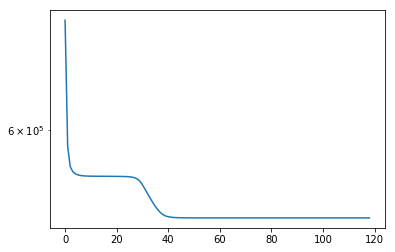

In [88]:
plt.semilogy(range(iter_num), obj_val)

--------------------------

### Задание 5: LP - релаксация

Неориентированный граф $G = (V, E)$.

Независимое множество вершин - такое множество вершин графа $G$, что любые две вершины в нем не смежны, т.е. никакая пара вершин не соединена ребром.

Задача о независимом множестве:

$$\underset{x}{\min} -1^Tx$$
$$\mathrm{s.t.} \quad x_i + x_j \leq 1, \forall (i, j) \in E$$
$$x_i \in \{0, 1\}, \forall i \in V$$

LP-релаксация данной задачи состоит в замене ограничения $x_i \in \{0, 1\}$ на $0 \leq x_i \leq 1$

Даны графы:

<img src="graphs_pics.png">

In [130]:
def max_independent_set(graph):
    independent_set = set({0})
    for k in range(1, len(graph)):
        vertices = get_vertices(graph[:, k])
        if vertices.isdisjoint(independent_set):
            independent_set.add(k)
    return independent_set

In [133]:
def get_vertices(col):
    vertices = set()
    for k in range(len(col)):
        if col[k] == 1:
            vertices.add(k)
    return vertices

**Первый граф.**

1. Полный перебор вершин

In [139]:
# матрица смежности
M = np.array([[0, 1, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 1, 1, 0, 0],
              [0, 0, 1, 0, 1, 1, 0],
              [0, 0, 1, 1, 0, 0, 1],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0]])

print("1. max independent set: ", max_independent_set(M))

1. max independent set:  {0, 2, 5, 6}


2. LP-релаксация 

In [140]:
# Gx >= h

# matrix G
n = 7
I = np.eye(n, n)
A = np.concatenate((I, I*(-1)))

B = np.array([[1, 1, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 1, 0, 1]])
G = np.concatenate((B, A))
G = matrix(G)

# vector h
h1 = np.array([1.]*2*n)
h2 = np.array([0.]*n)
h = np.concatenate((h1, h2))
h = matrix(h)

# f(x) = c^T x
c = matrix([-1.]*n)

In [141]:
sol = solvers.lp(c, G, h)

     pcost       dcost       gap    pres   dres   k/t
 0: -3.5000e+00 -2.1727e+01  4e+01  1e+00  3e+00  1e+00
 1: -3.9135e+00 -5.3722e+00  1e+00  2e-01  4e-01  9e-01
 2: -3.9545e+00 -4.2260e+00  2e-01  3e-02  6e-02  1e-01
 3: -3.9993e+00 -4.0033e+00  3e-03  4e-04  9e-04  2e-03
 4: -4.0000e+00 -4.0000e+00  3e-05  4e-06  9e-06  2e-05
 5: -4.0000e+00 -4.0000e+00  3e-07  4e-08  9e-08  2e-07
Optimal solution found.


In [143]:
x = np.array(sol['x'])
print(np.round(x))

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]


В результате получаем множество, в которое входят вершины с номерами: 0, 2, 6, 7.
    
Полученное решение совпадает с решением, полученным полным перебором.

Проверка: $1^Tx^* \geq \frac{|V|}{2}$

In [153]:
sum(x) >= n/2

array([ True])

Обобщение условий:
Заменим $x_i + x_j \leq 1$ на более общие условия $\sum_{i \in D}x_i \leq \alpha (D)$, где $D$ - связный подграф графа $G$, а $\alpha (D)$ - его число независимости (число вершин в наибольшем независимом множестве $D$)

In [3]:
# все подграфы, размер которых не превышает 3

n = 7
I = np.eye(n, n)
A = np.concatenate((I, I*(-1)))

B = np.array([[1, 1, 1, 0, 0, 0, 0],
              [0, 1, 1, 1, 0, 0, 0],
              [0, 1, 1, 0, 1, 0, 0],
              [0, 0, 1, 1, 1, 0, 0],
              [0, 0, 1, 1, 0, 1, 0],
              [0, 0, 1, 0, 1, 0, 1],
              [0, 0, 0, 1, 1, 1, 0],
              [0, 0, 0, 1, 1, 0, 1],
              [1, 1, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 1, 0, 1]])
G = np.concatenate((B, A))
G = matrix(G)

# vector h
h1 = np.array([2., 2., 2., 1., 2., 2., 2., 2.])
h2 = np.array([1.]*2*n)
h3 = np.array([0.]*n)
h = np.concatenate((h1, h2, h3))
h = matrix(h)

# f(x) = c^T x
c = matrix([-1.]*n)

In [4]:
sol = solvers.lp(c, G, h)

     pcost       dcost       gap    pres   dres   k/t
 0: -4.1401e+00 -3.9236e+01  7e+01  1e+00  7e+00  1e+00
 1: -4.1656e+00 -8.0351e+00  2e+00  2e-01  1e+00  1e+00
 2: -3.9171e+00 -4.7489e+00  4e-01  4e-02  2e-01  2e-01
 3: -3.9973e+00 -4.0252e+00  2e-02  1e-03  7e-03  5e-03
 4: -4.0000e+00 -4.0003e+00  2e-04  1e-05  7e-05  5e-05
 5: -4.0000e+00 -4.0000e+00  2e-06  1e-07  7e-07  5e-07
 6: -4.0000e+00 -4.0000e+00  2e-08  1e-09  7e-09  5e-09
Optimal solution found.


In [6]:
x = np.array(sol['x'])
print(np.round(x))

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]


Проверка:

In [154]:
sum(x) >= n/2

array([ True])

**Второй граф**

1. Полный перебор вершин.

In [156]:
# матрица смежности
M = np.array([[0, 1, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 1, 1, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 0, 1, 1, 0, 1, 0],
              [0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 0, 1, 0]])

print("2. max independent set: ", max_independent_set(M))

2. max independent set:  {0, 2, 5}


2. LP-релаксация

In [157]:
n = 7
I = np.eye(n, n)
A = np.concatenate((I, I*(-1)))

B = np.array([[1, 1, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 1, 1]])
G = np.concatenate((B, A))
G = matrix(G)

h1 = np.array([1.]*2*n)
h2 = np.array([0.]*n)
h = np.concatenate((h1, h2))
h = matrix(h)

c = matrix([-1.]*n)

In [158]:
sol = solvers.lp(c, G, h)

     pcost       dcost       gap    pres   dres   k/t
 0: -3.5000e+00 -2.1457e+01  4e+01  1e+00  3e+00  1e+00
 1: -3.7783e+00 -5.2722e+00  1e+00  2e-01  4e-01  9e-01
 2: -3.5457e+00 -3.7428e+00  1e-01  2e-02  5e-02  1e-01
 3: -3.5005e+00 -3.5026e+00  1e-03  2e-04  5e-04  1e-03
 4: -3.5000e+00 -3.5000e+00  1e-05  2e-06  5e-06  1e-05
 5: -3.5000e+00 -3.5000e+00  1e-07  2e-08  5e-08  1e-07
Optimal solution found.


In [159]:
x = np.array(sol['x'])
print(x)

[[0.65401149]
 [0.34598852]
 [0.50000001]
 [0.5       ]
 [0.50000001]
 [0.34598852]
 [0.65401149]]


Проверка:

In [160]:
s = sum(x)
s >= n/2

array([ True])

Обобщение условий:

1. Рассмотрим все подграфы, размер которых не превышает 3

In [7]:
# matrix G
n = 7
I = np.eye(n, n)
A = np.concatenate((I, I*(-1)))
# все подграфы, размер которых не превышает 3
B = np.array([[1, 1, 1, 0, 0, 0, 0],
              [0, 1, 1, 1, 0, 0, 0],
              [0, 1, 1, 0, 1, 0, 0],
              [0, 0, 1, 1, 1, 0, 0],
              [0, 0, 1, 0, 1, 1, 0],
              [0, 0, 0, 1, 1, 1, 0],
              [0, 0, 0, 0, 1, 1, 1],
              [1, 1, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 1, 1]])

G = np.concatenate((B, A))
G = matrix(G)

# vector h
h1 = np.array([2., 2., 2., 1., 2., 2., 2.])
h2 = np.array([1.]*2*n)
h3 = np.array([0.]*n)
h = np.concatenate((h1, h2, h3))
h = matrix(h)

# f(x) = c^T x
c = matrix([-1.]*n)

In [8]:
sol = solvers.lp(c, G, h)

     pcost       dcost       gap    pres   dres   k/t
 0: -3.9774e+00 -3.6903e+01  7e+01  1e+00  7e+00  1e+00
 1: -3.7745e+00 -8.7785e+00  4e+00  2e-01  1e+00  1e+00
 2: -3.0232e+00 -3.2081e+00  1e-01  8e-03  4e-02  1e-02
 3: -3.0002e+00 -3.0021e+00  1e-03  8e-05  4e-04  1e-04
 4: -3.0000e+00 -3.0000e+00  1e-05  8e-07  4e-06  1e-06
 5: -3.0000e+00 -3.0000e+00  1e-07  8e-09  4e-08  1e-08
Optimal solution found.


In [9]:
x = np.array(sol['x'])
print(x)

[[0.53080708]
 [0.46919293]
 [0.31978973]
 [0.36042055]
 [0.31978973]
 [0.46919293]
 [0.53080708]]


2. Рассмотрим все подграфы, размер которых не превышает 4

In [10]:
# matrix G
n = 7
I = np.eye(n, n)
A = np.concatenate((I, I*(-1)))
# все подграфы, размер которых не превышает 4
B = np.array([[1, 1, 1, 0, 0, 0, 0],
              [0, 1, 1, 1, 0, 0, 0],
              [0, 1, 1, 0, 1, 0, 0],
              [0, 0, 1, 1, 1, 0, 0],
              [0, 0, 1, 0, 1, 1, 0],
              [0, 0, 0, 1, 1, 1, 0],
              [0, 0, 0, 0, 1, 1, 1],
              [1, 1, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 1, 1],
              [1, 1, 1, 1, 0, 0, 0],
              [1, 1, 1, 0, 1, 0, 0],
              [0, 1, 1, 1, 1, 0, 0],
              [0, 1, 1, 0, 1, 1, 0],
              [0, 0, 1, 1, 1, 1, 0],
              [0, 0, 0, 1, 1, 1, 1]])

G = np.concatenate((B, A))
G = matrix(G)

# vector h
h1 = np.array([2., 2., 2., 1., 2., 2., 2.])
h2 = np.array([2.]*6)
h3 = np.array([1.]*2*n)
h4 = np.array([0.]*n)
h = np.concatenate((h1, h2, h3, h4))
h = matrix(h)

# f(x) = c^T x
c = matrix([-1.]*n)

In [11]:
sol = solvers.lp(c, G, h)

     pcost       dcost       gap    pres   dres   k/t
 0: -3.2413e+00 -4.8949e+01  1e+02  1e+00  1e+01  1e+00
 1: -2.1483e+00 -5.8706e+00  3e+00  1e-01  1e+00  8e-01
 2: -1.9889e+00 -2.4176e+00  3e-01  2e-02  1e-01  9e-02
 3: -2.0005e+00 -2.0134e+00  1e-02  5e-04  4e-03  2e-03
 4: -2.0000e+00 -2.0001e+00  1e-04  5e-06  4e-05  2e-05
 5: -2.0000e+00 -2.0000e+00  1e-06  5e-08  4e-07  2e-07
 6: -2.0000e+00 -2.0000e+00  1e-08  5e-10  4e-09  2e-09
Optimal solution found.


In [13]:
x = np.array(sol['x'])
print(x)

[[4.68894049e-01]
 [2.50387787e-01]
 [2.80718164e-01]
 [3.52406482e-10]
 [4.81003471e-10]
 [3.57593002e-01]
 [6.42406998e-01]]


В данном случае однозначное решение не получается даже при увеличении количества условий.